## MERCEDES BENZ GREENER MANUFACTURING PROJECT

In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os,gc
import seaborn as sns
%matplotlib inline
palette=sns.color_palette()
sns.set()

In [2]:
#load the dataset
df=pd.read_csv('train.csv')

In [3]:
#check the shape
df.shape

(4209, 378)

In [4]:
#check 1st 5 rows
df.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [5]:
#Exploratory Data analysis
y=df['y'].values

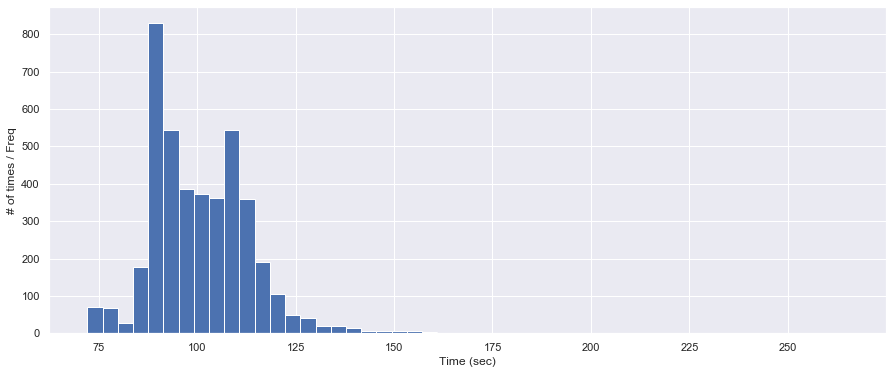

In [6]:
#plot histogram
plt.figure(figsize=(15,6))
plt.hist(y,bins=50)
plt.ylabel('# of times / Freq')
plt.xlabel('Time (sec)');

In [7]:
minimum=min(y)
maximum=max(y)
mean_val=y.mean()
std=y.std()

print(f'Min: {minimum} \nMax: {maximum} \nMean: {mean_val} \nSD: {std}')

Min: 72.11 
Max: 265.32 
Mean: 100.66931812782134 
SD: 12.6778749695168


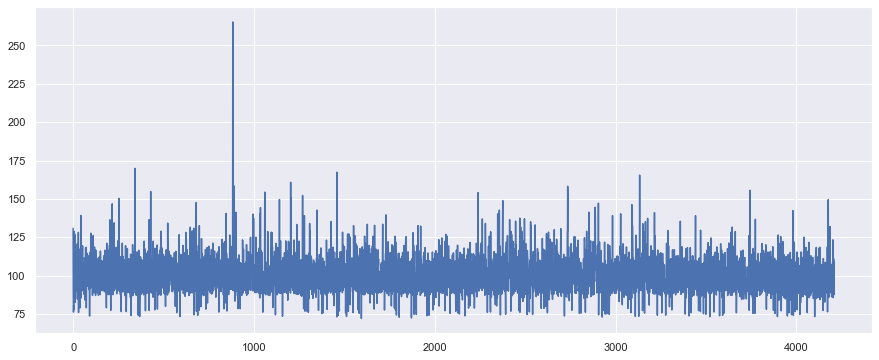

In [8]:
## Time Series Exploration - checking if things are changing over time
plt.figure(figsize=(15,6))
plt.plot(y)

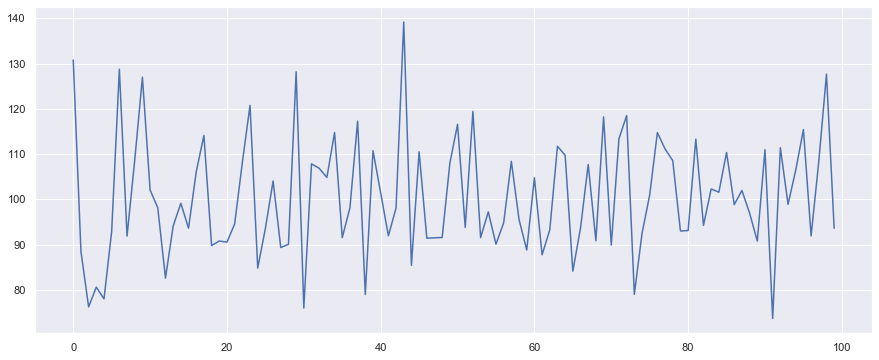

In [9]:
plt.figure(figsize=(15,6))
plt.plot(y[:100])

In [10]:
## PERFORMING FEATURE ANALYSIS

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


In [11]:
# check if any null values
df.isnull().sum()

ID      0
y       0
X0      0
X1      0
X2      0
X3      0
X4      0
X5      0
X6      0
X8      0
X10     0
X11     0
X12     0
X13     0
X14     0
X15     0
X16     0
X17     0
X18     0
X19     0
X20     0
X21     0
X22     0
X23     0
X24     0
X26     0
X27     0
X28     0
X29     0
X30     0
       ..
X355    0
X356    0
X357    0
X358    0
X359    0
X360    0
X361    0
X362    0
X363    0
X364    0
X365    0
X366    0
X367    0
X368    0
X369    0
X370    0
X371    0
X372    0
X373    0
X374    0
X375    0
X376    0
X377    0
X378    0
X379    0
X380    0
X382    0
X383    0
X384    0
X385    0
Length: 378, dtype: int64

In [12]:
#Identify how many features are constant, binary and categorical
counts=[[],[],[]]

cols=df.columns

for c in cols:
    uniq=len(np.unique(df[c]))
    if uniq==1:
        counts[0].append(c)
    elif uniq==2 and df[c].dtype==np.int64:
        counts[1].append(c)
    else:
        counts[2].append(c)

In [13]:
# Print summary of features
print(f'Constant features: {len(counts[0])} \n Binary Features: {len(counts[1])} \n Categorical Features: {len(counts[2])}')

Constant features: 12 
 Binary Features: 356 
 Categorical Features: 10


In [14]:
## XGBoost Implementation
dftst = pd.read_csv('test.csv')

In [15]:
dftst.describe()

,ID,X10,X11,X12,X13,X14,X15,X16,X17,X18,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4211.039202,0.019007,0.000238,0.074364,0.061060,0.427893,0.000713,0.002613,0.008791,0.010216,...,0.325968,0.049656,0.311951,0.019244,0.011879,0.008078,0.008791,0.000475,0.000713,0.001663
std,2423.078926,0.136565,0.015414,0.262394,0.239468,0.494832,0.026691,0.051061,0.093357,0.100570,...,0.468791,0.217258,0.463345,0.137399,0.108356,0.089524,0.093357,0.021796,0.026691,0.040752
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2115.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4202.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6310.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8416.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
dftst.columns

Index(['ID', 'X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8', 'X10',
       ...
       'X375', 'X376', 'X377', 'X378', 'X379', 'X380', 'X382', 'X383', 'X384',
       'X385'],
      dtype='object', length=377)

In [17]:
coltst=list(set(df.columns)-set(['ID','y']))

In [18]:
ord('a')

97

In [19]:
y_train = df['y'].values
id_tst = dftst['ID'].values
x_train = df[coltst]
x_test = dftst[coltst]
for col in coltst:
    cardinality = len(np.unique(x_train[col]))
    if cardinality==1:
        x_train.drop(col,axis=1)
        x_test.drop(col,axis=1)
    if cardinality>2:
        mapper=lambda x: sum([ord(d) for d in x]) #ord returns ascii val
        x_train[col] = x_train[col].apply(mapper)
        x_test[col] = x_test[col].apply(mapper)

C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\HOME\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [20]:
x_train[['X0','X1','X2','X3','X4','X5','X6','X8']]

,X0,X1,X2,X3,X4,X5,X6,X8
0,107,118,213,97,100,117,106,111
1,107,116,215,101,100,121,108,111
2,219,119,110,99,100,120,106,120
3,219,116,110,102,100,120,108,101
4,219,118,110,102,100,104,100,110
5,116,98,101,99,100,103,104,115
6,205,114,101,102,100,102,104,115
7,111,108,212,102,100,102,106,97
8,119,115,212,101,100,102,105,104
9,106,98,210,99,100,102,97,101


In [21]:
import xgboost as xgb

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_valid, y_train,y_valid=train_test_split(x_train, y_train,test_size=0.15,random_state=42)

In [23]:
d_train=xgb.DMatrix(x_train,label=y_train)
d_valid=xgb.DMatrix(x_valid, label=y_valid)
d_test=xgb.DMatrix(x_test)

In [24]:
params={}
params['objective']='reg:linear'
params['eta']=0.02
params['max_depth']=4

def xgb_r2_score(preds,dtrain):
    labels=dtrain.get_label()
    return 'r2',r2_score(labels, preds)

watchlist=[(d_train,'train'),(d_valid,'valid')]

clf=xgb.train(params, d_train,1000,watchlist,early_stopping_rounds=50,feval=xgb_r2_score,maximize=True,verbose_eval=10)

[13:11:06] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:98.9988	valid-rmse:98.7763	train-r2:-59.0801	valid-r2:-65.3143
Multiple eval metrics have been passed: 'valid-r2' will be used for early stopping.

Will train until valid-r2 hasn't improved in 50 rounds.
[10]	train-rmse:81.0613	valid-rmse:80.8167	train-r2:-39.2808	valid-r2:-43.3919
[20]	train-rmse:66.4338	valid-rmse:66.1631	train-r2:-26.0551	valid-r2:-28.7532
[30]	train-rmse:54.5185	valid-rmse:54.2172	train-r2:-17.2204	valid-r2:-18.9791
[40]	train-rmse:44.8282	valid-rmse:44.4907	train-r2:-11.3189	valid-r2:-12.4536
[50]	train-rmse:36.9655	valid-rmse:36.5905	train-r2:-7.37652	valid-r2:-8.09995
[60]	train-rmse:30.6066	valid-rmse:30.1894	train-r2:-4.74251	valid-r2:-5.19457
[70]	train-rmse:25.488	valid-rmse:25.023	train-r2:-2.98238	valid-r2:-3.25581
[80]	train-rmse:21.3944	valid-rmse:20.8788	train-r2:-1.8059	valid-

In [25]:
ptest=clf.predict(d_test)

In [26]:
pred=pd.DataFrame()

In [27]:
pred['ID']=id_tst
pred['predicted_y']=ptest

In [28]:
pred.head(30)

,ID,predicted_y
0,1,85.930023
1,2,103.157776
2,3,86.619102
3,4,77.130974
4,5,111.161095
5,8,92.674454
6,10,111.736572
7,11,93.989296
8,12,115.994980
9,14,94.623795
